In [1]:
import string

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

import re

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Кодирование слов для компьютера
* [Чудесный мир Word Embeddings: какие они бывают и зачем нужны?](https://habrahabr.ru/company/ods/blog/329410/)
* [Немного про word2vec: полезная теория](http://nlpx.net/archives/179)
* [Word2Vec: как работать с векторными представлениями слов](https://neurohive.io/ru/osnovy-data-science/word2vec-vektornye-predstavlenija-slov-dlja-mashinnogo-obuchenija/)

У нас есть слова и есть компьютер, который должен с этими словами как-то работать. Вопрос — как компьютер будет работать со словами? Идеи:
## Label encoding
Суть — закодировать слова цифрами по порядку следования в словаре.

Но у этой идеи есть и существенный недостаток: слова в словаре следуют в алфавитном порядке, и при добавлении слова нужно перенумеровывать заново большую часть слов. Но даже это не является настолько важным, а важно то, **буквенное написание слова никак не связано с его смыслом** (эту гипотезу еще в конце XIX века высказал известный лингвист Фердинанд де Соссюр). В самом деле слова “петух”, “курица” и “цыпленок” имеют очень мало общего между собой и стоят в словаре далеко друг от друга, хотя очевидно обозначают самца, самку и детеныша одного вида птицы. То есть мы можем выделить два вида близости слов: лексический и семантический. Как мы видим на примере с курицей, эти близости не обязательно совпадают. Можно для наглядности привести обратный пример лексически близких, но семантически далеких слов — "зола" и "золото".

## Embeddings
Чтобы получить возможность представить семантическую близость, было предложено использовать embedding, то есть сопоставить слову некий вектор, отображающий его значение в “пространстве смыслов”. Embedding — это сопоставление произвольной сущности (например, узла в графе или кусочка картинки) некоторому вектору. Векторное представление даёт возможность сравнивать тексты, сравнивая представляющие их вектора в какой-либо метрике (евклидово расстояние, косинусная мера, манхэттенское расстояние, расстояние Чебышёва и др.), то есть производя кластерный анализ.

### One-hot encoding
Какой самый простой способ получить вектор из слова? Кажется, что естественно будет взять вектор длины нашего словаря и поставить только одну единицу в позиции, соответствующей номеру слова в словаре. Этот подход называется one-hot encoding (OHE). OHE все еще не обладает свойствами семантической близости.
![](images/one-hot-embedding.png)
### Bag of words, BoW
Значение одного слова нам может быть и не так важно, т.к. речь (и устная, и письменная) состоит из наборов слов, которые мы называем текстами. Так что если мы захотим как-то представить тексты, то мы возьмем OHE-вектор каждого слова в тексте и сложим вместе. Т.е. на выходе получим просто подсчет количества различных слов в тексте в одном векторе. Такой подход называется “мешок слов” (bag of words, BoW), потому что мы теряем всю информацию о взаимном расположении слов внутри текста.

Мы можем пойти дальше и представить наш корпус (набор текстов) в виде матрицы “слово-документ” (term-document).
![](images/bow-embedding.gif)
Эта матрица приводит нас к тематическим моделям, где матрицу “слово-документ” пытаются представить в виде произведения двух матриц “слово-тема” и “тема-документ”. В самом простом случае мы возьмем матрицу и с помощью SVD-разложения получим представление слов через темы и документов через темы.

### TF-IDF
Эта аббревиатура означает "term frequency — inverse document frequency", что является модификацией матрицы term-document. Эта мера используется для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален количеству употребления этого слова в документе, и обратно пропорционален частоте употребления слова в других документах коллекции.

TF (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа. Таким образом, оценивается важность слова $t_{i}$ в пределах отдельного документа.

$${\displaystyle \mathrm {tf} (t,d)={\frac {n_{t}}{\sum _{k}n_{k}}}},$$
где $n_t$ есть число вхождений слова $t$ в документ, а в знаменателе — общее число слов в данном документе.

IDF (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции. Учёт IDF уменьшает вес широкоупотребительных слов. Для каждого уникального слова в пределах конкретной коллекции документов существует только одно значение IDF.

$${\displaystyle \mathrm {idf} (t,D)=\log {\frac {|D|}{|\{\,d_{i}\in D\mid t\in d_{i}\,\}|}}} ,$$
где

* $|D|$ — число документов в коллекции;
* ${\displaystyle |\{\,d_{i}\in D\mid t\in d_{i}\,\}|}$ — число документов из коллекции $D$, в которых встречается $t$ (когда ${\displaystyle n_{t}\neq 0}$).


Таким образом, мера TF-IDF является произведением двух сомножителей:

$$ \operatorname {tf-idf}(t,d,D)=\operatorname {tf}(t,d)\times \operatorname {idf}(t,D)$$
Большой вес в TF-IDF получат слова с высокой частотой в пределах конкретного документа и с низкой частотой употреблений в других документах.

### word2vec
* [Word2Vec в примерах](https://habrahabr.ru/post/249215/)
* [Немного про word2vec: полезная теория](http://nlpx.net/archives/179)
* [Учим компьютер писать как Толстой, том I](https://habrahabr.ru/post/343704/)

Описанные выше подходы были (и остаются) хороши для времен (или областей), где количество текстов мало и словарь ограничен, хотя, как мы видели, там тоже есть свои сложности. Но с приходом в нашу жизнь интернета все стало одновременно и сложнее и проще: в доступе появилось великое множество текстов, и эти тексты с изменяющимся и расширяющимся словарем. С этим надо было что-то делать, а ранее известные модели не могли справиться с таким объемом текстов. Количество слов в английском языке очень грубо составляет миллион — матрица совместных встречаемостей только пар слов будет $10^6 x 10^6$. Такая матрица даже сейчас не очень лезет в память компьютеров, а, скажем, 10 лет назад про такое можно было не мечтать.

И тогда, как это часто бывает, был предложен выход по принципу “тот, кто нам мешает, тот нам поможет!” А именно, в 2013 году тогда мало кому известный чешский аспирант Томаш Миколов предложил свой подход к word embedding, который он назвал word2vec. Его подход основан на другой важной гипотезе, которую в науке принято называть гипотезой локальности — “слова, которые встречаются в одинаковых окружениях, имеют близкие значения”. Близость в данном случае понимается очень широко, как то, что рядом могут стоять только сочетающиеся слова. Например, для нас привычно словосочетание "заводной будильник". А сказать “заводной апельсин” мы не можем* — эти слова не сочетаются.

Основываясь на этой гипотезе Томаш Миколов предложил новый подход, который не страдал от больших объемов информации, а наоборот выигрывал. Модель, предложенная Миколовым очень проста (и потому так хороша) — мы будем предсказывать вероятность слова по его окружению (контексту). То есть мы будем учить такие вектора слов, чтобы вероятность, присваиваемая моделью слову была близка к вероятности встретить это слово в этом окружении в реальном тексте.

$$P(w_o| w_c)=\frac{e^{s(w_o, w_c)}}{\sum_{w_i \in V} e^{s(w_i, w_c)}}$$
Здесь $w_o$ — вектор целевого слова, $w_c$ — это некоторый вектор контекста, вычисленный (например, путем усреднения) из векторов окружающих нужное слово других слов. А $s(w1,w2)$ — это функция, которая двум векторам сопоставляет одно число.

Процесс тренировки устроен следующим образом: мы берем последовательно (2k+1) слов, слово в центре является тем словом, которое должно быть предсказано. А окружающие слова являются контекстом длины по k с каждой стороны. Каждому слову в нашей модели сопоставлен уникальный вектор, который мы меняем в процессе обучения нашей модели.

В целом, этот подход называется CBOW — continuous bag of words, continuous потому, что мы скармливаем нашей модели последовательно наборы слов из текста, a BoW потому что порядок слов в контексте не важен.

Также Миколовым сразу был предложен другой подход — прямо противоположный CBOW, который он назвал skip-gram, то есть “словосочетание с пропуском”. Мы пытаемся из данного нам слова угадать его контекст (точнее вектор контекста). В остальном модель не претерпевает изменений.

Что стоит отметить: хотя в модель не заложено явно никакой семантики, а только статистические свойства корпусов текстов, оказывается, что натренированная модель word2vec может улавливать некоторые семантические свойства слов. Например:

![](images/w2v_sem2.gif)

Слово "мужчина" относится к слову "женщина" так же, как слово "дядя" к слову "тётя", что для нас совершенно естественно и понятно, но в других моделям добиться такого же соотношения векторов можно только с помощью специальных ухищрений. Здесь же — это происходит естественно из самого корпуса текстов. Кстати, помимо семантических связей, улавливаются и синтаксические, справа показано соотношение единственного и множественного числа.

Помимо word2vec были, само собой, предложены и другие модели word embedding. Стоит отметить модель, предложенную лабораторией компьютерной лингвистики Стенфордского университета, под названием Global Vectors (GloVe), сочетающую в себе черты SVD разложения и word2vec, а так же fasttext от facebook.

## word2vec: пример

Обученные модели можно найти здесь:
* http://rusvectores.org/ru/models/
* https://nlpub.ru/Russian_Distributional_Thesaurus#.D0.92.D0.B5.D0.BA.D1.82.D0.BE.D1.80.D0.B0_.D1.81.D0.BB.D0.BE.D0.B2_.28word_embeddings.29

In [5]:
from gensim.models import KeyedVectors as kv

In [6]:
w2v = kv.load_word2vec_format("./all.norm-sz100-w10-cb0-it1-min100.w2v",
                              binary=True, unicode_errors='ignore')

In [7]:
w2v["дерево"]

array([-0.22463728,  0.19349779, -0.04706636,  0.10628126, -0.15055035,
        0.16627243, -0.04609815,  0.12261495,  0.10102549,  0.05754292,
        0.30670774, -0.2168801 , -0.24247283,  0.11405526, -0.05224404,
       -0.16005169,  0.12927294, -0.06159532, -0.03366745, -0.21416241,
       -0.27862707,  0.15101013,  0.35221568, -0.24847834, -0.15394995,
        0.54413635, -0.10189039,  0.30302775, -0.01792451,  0.24240233,
       -0.76168525, -0.347514  ,  0.09200002,  0.04182635, -0.22412914,
        0.04406411,  0.20848222,  0.31611624, -0.30990618, -0.20273924,
        0.7232094 ,  0.24238911, -0.23824029,  0.03288474, -0.17126325,
        0.31279838,  0.03552097, -0.56581527, -0.35072896, -0.06475618,
        0.04143021, -0.05603983, -0.2525997 ,  0.2213401 ,  0.08859343,
        0.04765023,  0.16280289,  0.0699888 , -0.1491346 , -0.70663816,
       -0.1239922 ,  0.24046047,  0.30418178,  0.13356164,  0.29634994,
        0.6784539 , -0.00314437,  0.17065413,  0.07682237,  0.33

In [9]:
w2v.init_sims(replace=True)
for word, score in w2v.most_similar("дерево"):
    print(word, score)

дерево — 0.8678081035614014
деревце 0.867724597454071
деревцо 0.8552745580673218
буковое 0.85024493932724
дерево, — 0.8466764688491821
дерево… 0.8452416062355042
срубленное 0.8443729877471924
росшее 0.8330211639404297
спиленное 0.826280951499939
развесистое 0.8261986970901489


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [10]:
w2v.most_similar(positive=["женщина", "король"], negative=["мужчина"])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('королева', 0.8560205698013306),
 ('бургундская', 0.8100876808166504),
 ('регентша', 0.8040661215782166),
 ('клеменция', 0.7984250783920288),
 ('короля', 0.7981557250022888),
 ('ангулемская', 0.7949155569076538),
 ('королевская', 0.7862949371337891),
 ('анжуйская', 0.7808530330657959),
 ('лотарингская', 0.7741948962211609),
 ('маркграфиня', 0.7644592523574829)]

In [18]:
w2v.doesnt_match("собака цыплёнок курица петух несушка".split())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'собака'

In [19]:
w2v.doesnt_match("белый красный черный тяжелый".split())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'тяжелый'

In [29]:
w2v.similarity("москва", "париж"), w2v.similarity("женщина", "девочка"), w2v.similarity("женщина", "мужчина")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


(0.59192985, 0.7278056, 0.7695642)

# Классификация

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [28]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

#  Практика

Попробуем классифицировать тексты, размеченные на http://linis-crowd.org/.

In [32]:
polit = pd.read_excel("collection (docs&words)_2016_all_labels/doc_comment_summary.xlsx", header=None)

In [33]:
polit.head()

,0,1
0,Но при мужчине ни одна приличная женщина не по...,-1
1,Украина это часть Руси искусственно отделенная...,-1
2,Как можно говорить об относительно небольшой к...,-1
3,1.2014. а что они со своими поляками сделали?...,0
4,у а фильмы... Зрители любят диковинное. у ме...,0


## Препроцессинг

In [34]:
polit.columns = ["text", "score"]

In [50]:
polit["score"].value_counts()

0                        13930
-1                        9203
1                         1795
-2                        1534
2                          365
GalinaPozd                   6
Виталия Салина               5
Минченкова Елизавета         2
22158                        2
Yudenkova Dasha              1
Арина Макковеева             1
23523                        1
23486                        1
Иван Мишалкин                1
21887                        1
Анна Аникина                 1
Анна Вейдер                  1
Name: score, dtype: int64

In [54]:
(~polit["score"].isin(range(-2, 3))).sum()

46

In [56]:
polit = polit[polit["score"].isin(range(-2, 3))]

In [65]:
polit["score"] = pd.to_numeric(polit["score"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11432d630>]], dtype=object)

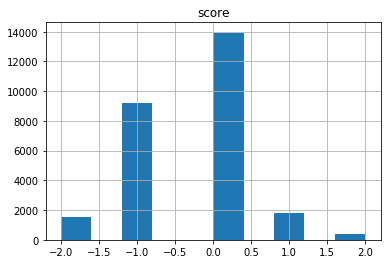

In [66]:
polit.hist(column="score")

In [325]:
def trinarize(score):
    if score < 0:
        return 2
    if score > 0:
        return 1
    else: return 0
polit["new_score"] = polit["score"].apply(trinarize)

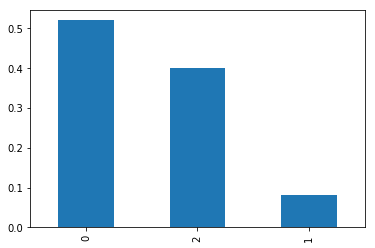

In [326]:
polit["new_score"].value_counts(normalize=True).plot(kind="bar")

In [76]:
from segtok.tokenizer import symbol_tokenizer, word_tokenizer, web_tokenizer

In [150]:
from pymystem3 import Mystem
m = Mystem()

красивый мама красиво мыть рама



In [151]:
polit["mystem"] = polit["text"].apply(str).apply(m.lemmatize)

#polit["text"].apply(str).apply(str.lower).apply(lambda text: re.sub("[^\w\s]", " ", text)).apply(word_tokenizer)

In [187]:
def remove_white_and_punct(tokens):
    tokens = filter(lambda token: not bool(re.match("^[\s\W]+$", token)), tokens)
    return list(tokens)

In [189]:
list(map(remove_white_and_punct, [["fdfs", " ", "   ", "?!"], ["fdfs", " ", "   "]]))

[['fdfs'], ['fdfs']]

In [190]:
polit["preprocessed"] = polit["mystem"].apply(remove_white_and_punct)

In [191]:
polit["preprocessed"]

0        [но, при, мужчина, ни, один, приличный, женщин...
1        [украина, это, часть, русь, искусственно, отде...
2        [как, можно, говорить, об, относительно, небол...
3        [1.2014, а, что, они, со, свой, поляк, сделать...
4        [у, а, фильм, зритель, любить, диковинный, у, ...
5        [государство, не, мочь, сейчас, платить, много...
6        [хотя, подозревать, что, все, из-за, то, что, ...
7        [2мм, пулемет, и, к, он, 2000, патрон, замена,...
8        [эксплуатировать, способный, только, на, бунт,...
9        [оральный, сторона, этот, пункт, быть, судить,...
10       [только, то, что, действительно, необходимый, ...
11       [зачем, нужный, этот, наркоцентр, кто, они, сп...
12       [а, какой, производство, что, можно, производи...
13       [ервый, хшир, второй, этри, третий, граузг, че...
14       [если, чинарь, потратить, не, по, статья, то, ...
15       [дорово, что, я, мочь, сказать, ну, и, пусть, ...
16       [но, тема, что, под, вид, вакцинация, сокращат.

In [222]:
from nltk.corpus import stopwords

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/hun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [197]:
from collections import Counter

In [198]:
from collections import Counter
c = Counter()
for _id, doc in polit["preprocessed"].iteritems():
    c.update(doc)

In [200]:
len(c)

77562

In [206]:
c.most_common(30)

[('и', 135974),
 ('в', 124379),
 ('не', 101522),
 ('на', 63496),
 ('что', 59714),
 ('быть', 54101),
 ('а', 51361),
 ('я', 45415),
 ('это', 43186),
 ('с', 41477),
 ('то', 33462),
 ('как', 28146),
 ('по', 26273),
 ('у', 25367),
 ('они', 24701),
 ('он', 24456),
 ('но', 23310),
 ('этот', 20750),
 ('так', 20516),
 ('за', 19772),
 ('все', 19184),
 ('вы', 18793),
 ('весь', 17372),
 ('если', 16848),
 ('к', 16499),
 ('такой', 16400),
 ('от', 14610),
 ('бы', 14353),
 ('же', 14245),
 ('который', 14118)]

In [218]:
most_freq = [w for w, c in c.most_common(30)]
most_rare = [w for w, c in c.items() if c < 6]

In [219]:
len(most_rare)

48198

In [233]:
most_rare[:10]

['рашкостан',
 'кавказороссияние',
 'москвабадский',
 'обезьянник',
 'говнорашка',
 '1.2014',
 'диковинный',
 'менструация',
 'провинциальность',
 'дмиртовка']

In [ ]:
most_rare

In [225]:
stopw = set(most_freq + most_rare + stopwords.words("russian"))

In [226]:
len(stopw)

48348

In [236]:
polit["preprocessed"] = polit["preprocessed"].apply(
    lambda tokens: " ".join([token for token in tokens if token not in stopw]))

In [237]:
polit["preprocessed"].head()

0    мужчина приличный женщина пойти лазить распрод...
1    украина часть русь искусственно отделять русск...
2    говорить относительно небольшой коррупция обра...
3    свой поляк сделать русский понятно литовский п...
4    фильм зритель любить соседка пятый месяц узнав...
Name: preprocessed, dtype: object

https://radimrehurek.com/gensim/models/phrases.html

In [301]:
from gensim.models.phrases import Phrases, Phraser

In [302]:
phrases = Phrases((doc.split() for _id, doc in polit["preprocessed"].iteritems()))

In [303]:
bigram = Phraser(phrases)

In [305]:
polit["preprocessed"] = polit["preprocessed"].apply(lambda x: bigram[x.split()])

In [306]:
polit["preprocessed"].head()

0    [мужчина, приличный, женщина, пойти, лазить, р...
1    [украина, часть, русь, искусственно, отделять,...
2    [говорить, относительно_небольшой, коррупция, ...
3    [свой, поляк, сделать, русский, понятно, литов...
4    [фильм, зритель, любить, соседка, пятый, месяц...
Name: preprocessed, dtype: object

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [262]:
count_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
count_features = count_vectorizer.fit_transform(polit["preprocessed"])

In [240]:
count_features

<26827x28915 sparse matrix of type '<class 'numpy.int64'>'
	with 1884729 stored elements in Compressed Sparse Row format>

In [264]:
count_vectorizer.get_feature_names()

[' !',
 ' )',
 ' ,',
 ' 0',
 ' 1',
 ' 2',
 ' 3',
 ' 4',
 ' 5',
 ' 6',
 ' 7',
 ' 8',
 ' 9',
 ' ?',
 ' _',
 ' a',
 ' b',
 ' c',
 ' d',
 ' e',
 ' f',
 ' g',
 ' h',
 ' i',
 ' j',
 ' k',
 ' l',
 ' m',
 ' n',
 ' o',
 ' p',
 ' q',
 ' r',
 ' s',
 ' t',
 ' u',
 ' v',
 ' w',
 ' x',
 ' y',
 ' z',
 ' µ',
 ' а',
 ' б',
 ' в',
 ' г',
 ' д',
 ' е',
 ' ж',
 ' з',
 ' и',
 ' й',
 ' к',
 ' л',
 ' м',
 ' н',
 ' о',
 ' п',
 ' р',
 ' с',
 ' т',
 ' у',
 ' ф',
 ' х',
 ' ц',
 ' ч',
 ' ш',
 ' щ',
 ' ъ',
 ' ы',
 ' ь',
 ' э',
 ' ю',
 ' я',
 ' і',
 ' ў',
 '!)',
 ') ',
 '+ ',
 '++',
 ', ',
 '-а',
 '-б',
 '-в',
 '-г',
 '-д',
 '-е',
 '-з',
 '-и',
 '-й',
 '-к',
 '-л',
 '-м',
 '-н',
 '-о',
 '-п',
 '-р',
 '-с',
 '-т',
 '-у',
 '-ф',
 '-х',
 '-ч',
 '-ш',
 '-э',
 '.0',
 '.1',
 '.2',
 '.3',
 '.4',
 '.5',
 '.6',
 '.7',
 '.8',
 '.9',
 '0 ',
 '0+',
 '0.',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '0a',
 '0n',
 '0p',
 '0x',
 '0в',
 '0г',
 '0е',
 '0ж',
 '0и',
 '0к',
 '0м',
 '0п',
 '0р',
 '0т',
 '0х',

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [343]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform([" ".join(doc) for _id, doc in polit["preprocessed"].iteritems()])

In [344]:
tfidf_features

<26827x53385 sparse matrix of type '<class 'numpy.float64'>'
	with 1729969 stored elements in Compressed Sparse Row format>

## Классификация

In [345]:
features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_features, polit["new_score"], test_size=0.3, random_state=42)

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [409]:
mnb = MultinomialNB(alpha=0.2)

In [410]:
mnb.fit(features_train, labels_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [411]:
predicted = mnb.predict(features_test)

In [412]:
predicted

array([2, 0, 0, ..., 0, 0, 2])

In [413]:
print(classification_report(labels_test, predicted))

             precision    recall  f1-score   support

          0       0.65      0.69      0.67      4238
          1       0.47      0.22      0.30       672
          2       0.58      0.61      0.59      3139

avg / total       0.61      0.62      0.61      8049



# Самостоятельная

Постройте классификатор, который отделяет спам от не-спама используя следующий набор данных: [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset).

In [11]:
sms = pd.read_csv("spam.csv", encoding="latin-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [13]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [15]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


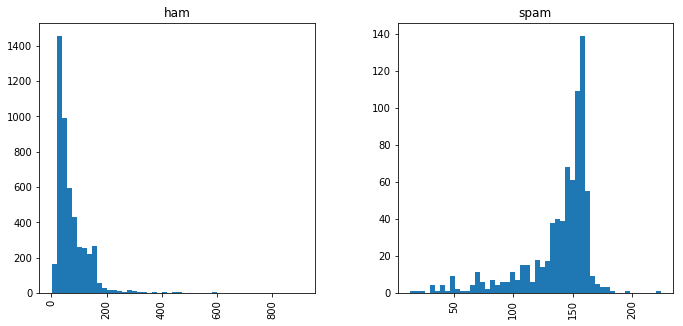

In [19]:
sms.hist(column='length', by='label', bins=50, figsize=(11, 5));

In [21]:
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)